### Creating Model tables with Stargazer

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style

import seaborn as sns
import statsmodels.api as sm

In [3]:
# Loading the datasets

murder=pd.read_stata('statemurder.dta')

y=murder['murder'] #dependent var
x=murder[['unemp', 'hsdip', 'prcapinc', 'police', 'south',
       'deathst']] #independent vars

In [4]:
# OLS and Predictions

model=sm.OLS(y,x).fit()
model.summary()

y_hat=model.predict() #y_hat values.

resid=model.resid #y-y_hat residuals

y=pd.DataFrame(y)
y.rename(columns={'murder':'y'}, inplace=True)

y_hat=pd.DataFrame(y_hat)
y_hat.rename(columns={0:'y_hat'},inplace=True)

resid=pd.DataFrame(resid)
resid.rename(columns={0:'resid'},inplace=True)


In [5]:

# Adding yhat and residuals into the original dataset for plotting.

true_vs_pred=pd.concat([y,y_hat,resid], axis=1)

finaldf=pd.concat([murder, true_vs_pred], axis=1) 



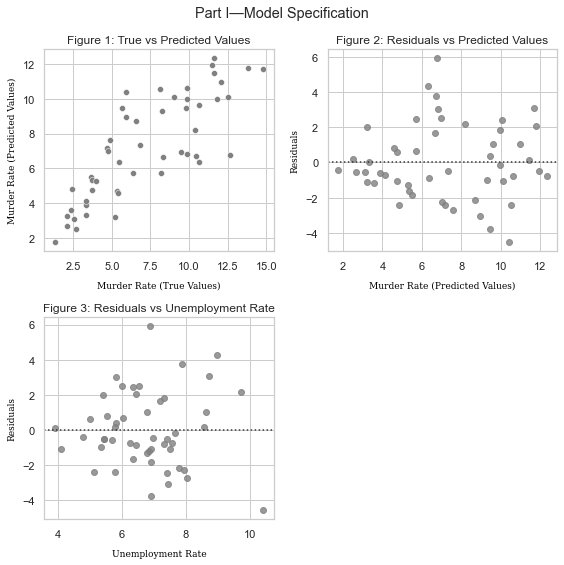

In [6]:
# Lets Plot!
# =============================================================================
#import matplotlib.style as style
#style.available #to see styles
#style.use('seaborn-darkgrid')
sns.set_theme(style="whitegrid")



fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(8,8))
plt.suptitle('Part I—Model Specification')
sns.scatterplot(x='y',y='y_hat',data=finaldf,color='gray', ax=ax[0,0])
sns.residplot(data=finaldf, x='y_hat', y='resid',color='gray', ax=ax[0,1])
sns.residplot(data=finaldf, x='unemp', y='resid',color='gray', ax=ax[1,0])

ax[0,0].set_xlabel('Murder Rate (True Values)', 
           family='serif', 
           color='black', 
           weight='normal', 
           size = 9,
           labelpad = 10)

ax[0,0].set_ylabel('Murder Rate (Predicted Values)', 
           family='serif', 
           color='black', 
           weight='normal', 
           size = 9,
           labelpad = 6)

ax[0,0].title.set_text('Figure 1: True vs Predicted Values')

ax[0,1].set_xlabel('Murder Rate (Predicted Values)', 
           family='serif', 
           color='black', 
           weight='normal', 
           size = 9,
           labelpad = 10)

ax[0,1].set_ylabel('Residuals', 
           family='serif', 
           color='black', 
           weight='normal', 
           size = 9,
           labelpad = 6)

ax[0,1].title.set_text('Figure 2: Residuals vs Predicted Values')


ax[1,0].set_xlabel('Unemployment Rate', 
           family='serif', 
           color='black', 
           weight='normal', 
           size = 9,
           labelpad = 10)

ax[1,0].set_ylabel('Residuals', 
           family='serif', 
           color='black', 
           weight='normal', 
           size = 9,
           labelpad = 6)

ax[1,0].title.set_text('Figure 3: Residuals vs Unemployment Rate')

ax[1,1].set_visible(False)
plt.tight_layout()
#plt.savefig('Figure123.pdf')

In [7]:
# Heteroscedasticity test
# =============================================================================
from statsmodels.compat import lzip

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

format(float('4.989371962556134e-05'),'.5f')


'0.00005'

In [9]:
# Part II—Out of Sample Plots
# =============================================================================


# =============================================================================
# Load Protest dataset
# =============================================================================
mm=pd.read_stata('mm.dta')
mm1=mm[['country', 'ccode', 'year','protestnumber','demand_price']]
mm_y_c=mm1.groupby(by=['ccode','year'])['protestnumber', 'demand_price'].count()                                                                                                                                             
mm_y_c.reset_index(inplace=True)
mm_y_c.drop(columns='demand_price', inplace=True)
mm_y_c.isnull().sum()
# =============================================================================
# Load Polity
# =============================================================================
polity16=pd.read_stata('polity2016.dta')
pol=polity16[(polity16['year']>1989)&(polity16['year']<2015)]
polity_small=pol[['ccode', 'year','polity2']]
polity_small.reset_index(inplace=True)
polity_small.drop(columns='index',inplace=True)

# =============================================================================
# Mergeing Protest and Polity
# =============================================================================

merge1=pd.merge(polity_small, mm_y_c,
         left_on=['ccode','year'],
         right_on=['ccode','year'])

merge1.shape
merge1.isnull().sum()
merge1.dropna(inplace=True)



# =============================================================================
# Merging a new data called PWT to our merged dataset (polity+protest) 
# =============================================================================
pwt=pd.read_stata('PWT.dta')

pwt['ccode']=pwt['ccode'].astype('int')

pwt_small=pwt[['sname', 'ccode',
     'year', 'pop','rgdpna', 'emp','pl_c',
     'pl_i', 'pl_g','pl_x', 'pl_m', 'pl_k','csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r']]

pwt_small.isnull().sum()


merge2=pd.merge(merge1, pwt_small, left_on=['ccode','year'],
                right_on=['ccode','year'])
merge2.shape
merge2.isnull().sum()

# =============================================================================
# transform "region" variable, the region is event-year.
# I need country-year 'region' variable.
# =============================================================================
mm.columns
aaa=mm[['ccode','year','country', 'region']]

bbb=aaa.drop_duplicates()
# =============================================================================
# Last merge! I add 'region' into our dataset.
# =============================================================================

merge3=pd.merge(merge2, bbb,left_on=['ccode','year'],
                right_on=['ccode','year'])

merge3.columns
merge3=merge3[['ccode', 'country', 'region','year', 'polity2', 'protestnumber', 'pop', 'rgdpna',
       'emp', 'pl_c', 'pl_i', 'pl_g', 'pl_x', 'pl_m', 'pl_k', 'csh_c', 'csh_i',
       'csh_g', 'csh_x', 'csh_m', 'csh_r']]

merge3.to_csv('finaldf_l3.csv')
merge3.shape
merge3.isnull().sum()
# =============================================================================

merge3.info()

merge3.groupby('region') ['protestnumber'].count()
dummies=pd.get_dummies(merge3['region'])

df=pd.concat([merge3, dummies],axis=1)
df.columns

df=df.set_index(['ccode','year'])


# =============================================================================
# 
# # Panel OLS (optional, country-year data is panel data)
# from linearmodels import PanelOLS
# 
#y=df['protestnumber']
#exog_vars=df[['polity2','pop','rgdpna','emp','pl_c','Europe']]
#
# x=sm.add_constant(exog_vars)
# mod=PanelOLS(y,x, entity_effects=True)
# fe_res=mod.fit()
# print(fe_res)
# 
# 
# =============================================================================

# =============================================================================
# Simple OLS (for the purpose of this exercise)
# =============================================================================
df1=df[['protestnumber','polity2','pop','rgdpna','emp','pl_c','Europe']]

df1.shape
y=df1['protestnumber']
x1=df1[['polity2','pop','rgdpna','emp','pl_c','Europe']]

x=sm.add_constant(x1)
mod=sm.OLS(y,x)
results=mod.fit()
results.summary()

/var/folders/lb/87v_57_5429939_f527p9dvr0000gn/T/ipykernel_22378/3844961739.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mm_y_c=mm1.groupby(by=['ccode','year'])['protestnumber', 'demand_price'].count()
/Users/oneryigit/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3523 entries, 0 to 3522
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ccode          3523 non-null   int16   
 1   country        3523 non-null   object  
 2   region         3523 non-null   category
 3   year           3523 non-null   int16   
 4   polity2        3523 non-null   float64 
 5   protestnumber  3523 non-null   int64   
 6   pop            3523 non-null   float64 
 7   rgdpna         3523 non-null   float64 
 8   emp            3523 non-null   float64 
 9   pl_c           3523 non-null   float64 
 10  pl_i           3523 non-null   float64 
 11  pl_g           3523 non-null   float64 
 12  pl_x           3523 non-null   float64 
 13  pl_m           3523 non-null   float64 
 14  pl_k           3523 non-null   float64 
 15  csh_c          3523 non-null   float64 
 16  csh_i          3523 non-null   float64 
 17  csh_g          3523 non-null   fl

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          protestnumber   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     45.00
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.63e-53
Time:                        23:40:11   Log-Likelihood:                -10760.
No. Observations:                3523   AIC:                         2.153e+04
Df Residuals:                    3516   BIC:                         2.158e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1049      0.181     17.116      0.000       2.749       3.461
polity2        0.0817      0.015      5.357      0.000       0.052       0.112
pop            0.0096      0.003      2.913      0.004       0.003       0.016
rgdpna       1.68e-06   1.51e-07     11.162      0.000    1.38e-06    1.98e-06
emp           -0.0269      0.007     -3.857      0.000      -0.041      -0.013
pl_c          -1.1228      0.354     -3.171      0.002      -1.817      -0.429
Europe         0.2938      0.228      1.290      0.197      -0.153       0.740
==============================================================================
Omnibus:                     3905.198   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           433231.049
Skew:                           5.543   Prob(JB):                         0.00
Kurtosis:                      56.183   Cond. No.                     4.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Stargazer Part

In [10]:
from stargazer.stargazer import Stargazer

stargazer=Stargazer([results])
stargazer.custom_columns('Model I')
stargazer.significant_digits(3)

stargazer.covariate_order(['polity2','pop','rgdpna','emp',
                           'pl_c','Europe','const'])


stargazer.rename_covariates({'polity2':'Polity Score',
                             'pop':'Population (Million)',
                             'rgdpna':'GDP',
                             'emp':'# of Employed',
                             'pl_c':'Household Consumption',
                             'Europe':'Europe (dummy)',
                             'const':'Constant'})

stargazer.cov_spacing = 3
print(stargazer.render_latex())


\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable:}} \
\cr \cline{1-2}
\\[-1.8ex] & \multicolumn{1}{c}{Model I} \\\\[-1.8ex] & (1) \\
\hline \\[-1.8ex]
 Polity Score & 0.082$^{***}$ \\
  & (0.015) \\
 Population (Million) & 0.010$^{***}$ \\
  & (0.003) \\
 GDP & 0.000$^{***}$ \\
  & (0.000) \\
 # of Employed & -0.027$^{***}$ \\
  & (0.007) \\
 Household Consumption & -1.123$^{***}$ \\
  & (0.354) \\
 Europe (dummy) & 0.294$^{}$ \\
  & (0.228) \\
 Constant & 3.105$^{***}$ \\
  & (0.181) \\
\hline \\[-1.8ex]
 Observations & 3,523 \\
 $R^2$ & 0.071 \\
 Adjusted $R^2$ & 0.070 \\
 Residual Std. Error & 5.136(df = 3516)  \\
 F Statistic & 44.996$^{***}$ (df = 6.0; 3516.0) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}
